# A fun FFT filter of the heartbeat

In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import scipy as sp

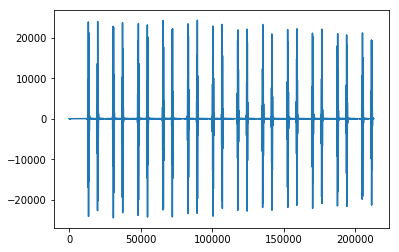

In [17]:
import scipy.io.wavfile
(rate,snd)=scipy.io.wavfile.read("hb1.wav")
plt.plot(snd)

In [3]:
ssize=2**16
fwin=np.hamming(ssize)

In [4]:
ff=np.fft.rfft(snd[:ssize])

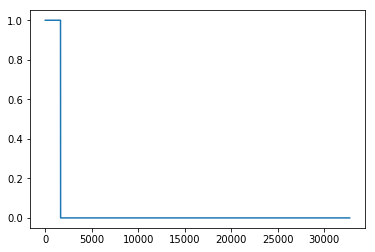

In [5]:
def ffunc(ix,cutoff):
    if ix < cutoff:
        return 1.0
    return 0.0

filt=[ffunc(ix,len(ff)/20) for ix in range(len(ff))]
plt.plot(filt)

In [6]:
ff=[ff[ix]*filt[ix] for ix in range(len(ff))]

In [7]:
fsamp=np.fft.irfft(ff)

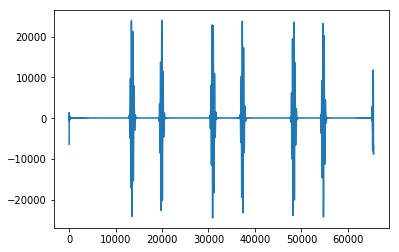

In [8]:

plt.plot(fsamp[:ssize])

In [9]:
filt_res=np.array([])
def fft_slice(startloc,fracbw):
    global filt_res
    ff=np.fft.rfft(snd[startloc:ssize+startloc])
    filt=[ffunc(ix,len(ff)/fracbw) for ix in range(len(ff))]
    ff=[ff[ix]*filt[ix] for ix in range(len(ff))]
    fsamp=np.fft.irfft(ff)
    filt_res=np.append(filt_res,fsamp)

In [32]:
filt_res=np.array([])
for startit in range(0,len(snd),ssize):
    fft_slice(startit,20)

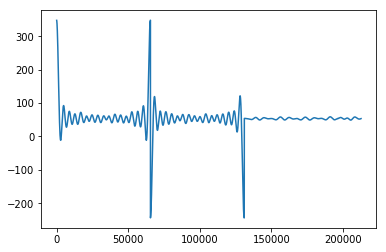

In [33]:
plt.plot(filt_res)

In [34]:
sf=max(snd)
filt_scale=[filt_res[ix]/sf for ix in range(len(filt_res))]
filt_scale=np.array(filt_scale)
scipy.io.wavfile.write("hb1_filt.wav",rate,filt_scale)

In [28]:
filt_scale[3]

0.0024230974578011346